In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/game-of-thrones/battles.csv
/kaggle/input/game-of-thrones/character-predictions.csv
/kaggle/input/game-of-thrones/character-deaths.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
battles = pd.read_csv('../input/game-of-thrones/battles.csv')
prediction = pd.read_csv('../input/game-of-thrones/character-predictions.csv')
deaths = pd.read_csv('../input/game-of-thrones/character-deaths.csv')

In [4]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
prediction.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [6]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [7]:
battles.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [8]:
battles= battles.drop(['attacker_1','attacker_2','attacker_3','attacker_4','defender_1','defender_2','defender_3','defender_4','note'],axis=1)

In [9]:
battles.fillna(method='ffill',inplace=True)

In [10]:
battles.isnull().sum()

name                  0
year                  0
battle_number         0
attacker_king         0
defender_king         0
attacker_outcome      0
battle_type           0
major_death           0
major_capture         0
attacker_size         0
defender_size         0
attacker_commander    0
defender_commander    0
summer                0
location              0
region                0
dtype: int64

In [11]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,1.0,0.0,15000.0,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands


Text(0, 0.5, 'battles')

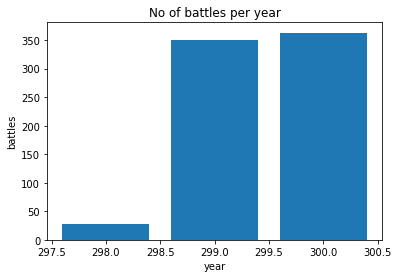

In [12]:
battles_per_year = battles.groupby('year',as_index=False).sum()
plt.bar(battles_per_year['year'],battles_per_year['battle_number'])
plt.title('No of battles per year')
plt.xlabel('year')
plt.ylabel('battles')

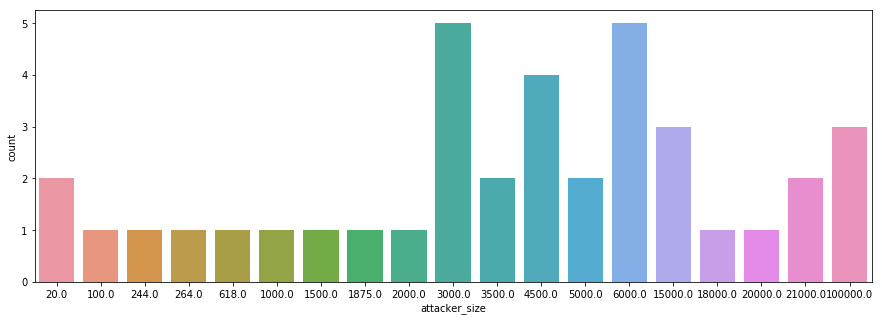

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(battles['attacker_size'])

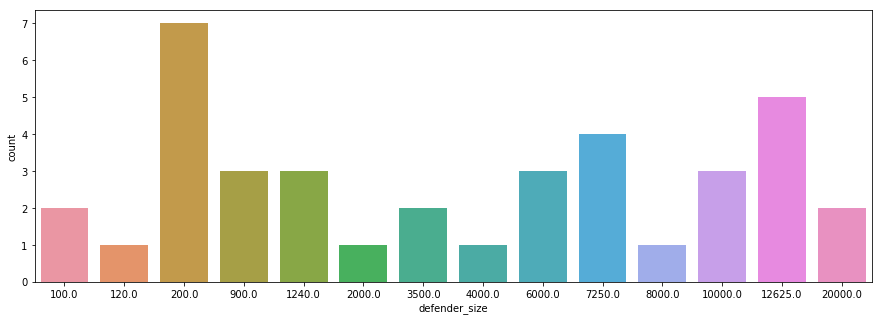

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(battles['defender_size'])

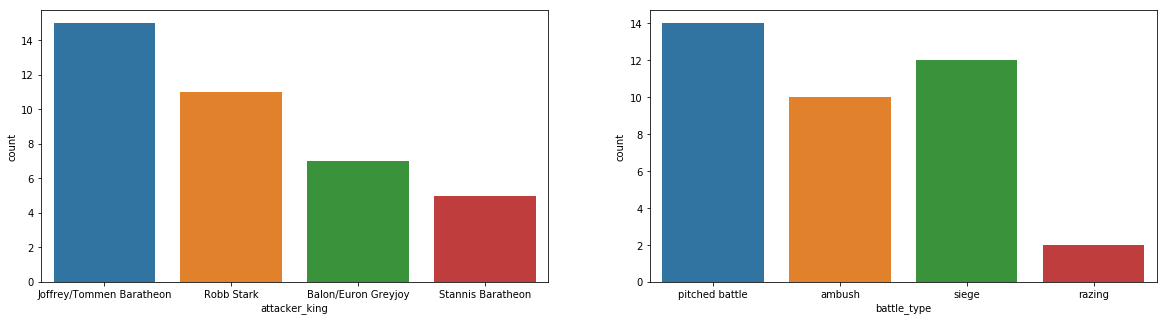

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(battles['attacker_king'])
plt.subplot(1,2,2)
sns.countplot(battles['battle_type'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

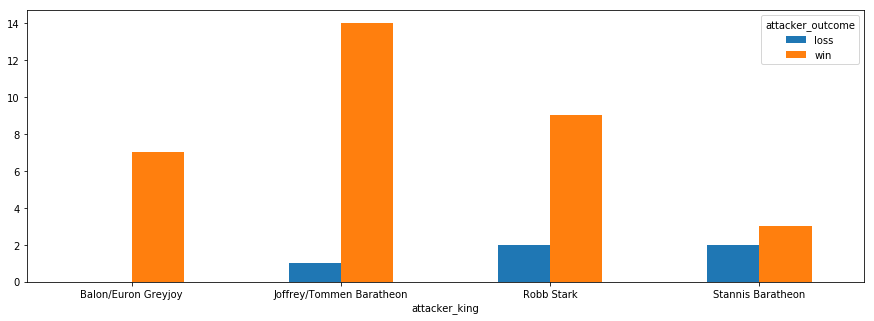

In [16]:
pd.crosstab(battles['attacker_king'],battles['attacker_outcome']).plot(kind='bar',figsize=(15,5))
plt.xticks(rotation='horizontal')

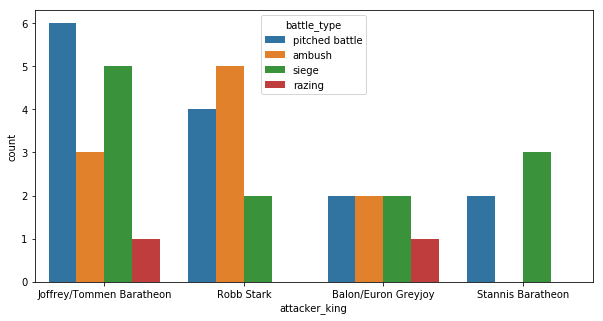

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(battles['attacker_king'],hue= battles['battle_type'])

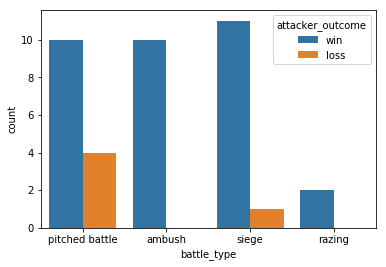

In [18]:
sns.countplot(x= battles['battle_type'],hue=battles['attacker_outcome'])
plt.show()

(-0.5, 10)

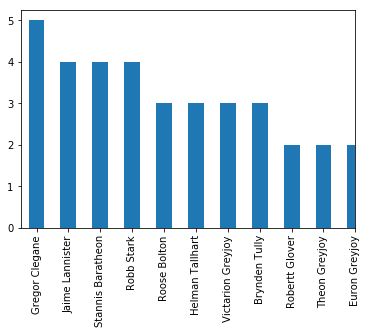

In [19]:
commanders= battles['attacker_commander'].str.cat(sep=', ').split(', ')
commanders= pd.Series(commanders).value_counts()
graph=commanders.plot.bar()
graph.set_xlim(right=10)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

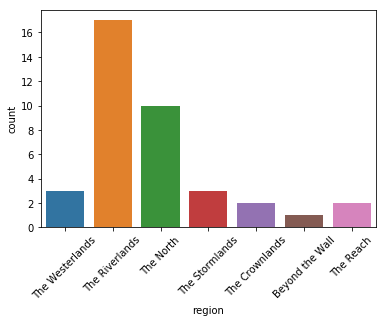

In [20]:
sns.countplot(battles['region'])
plt.xticks(rotation=45)


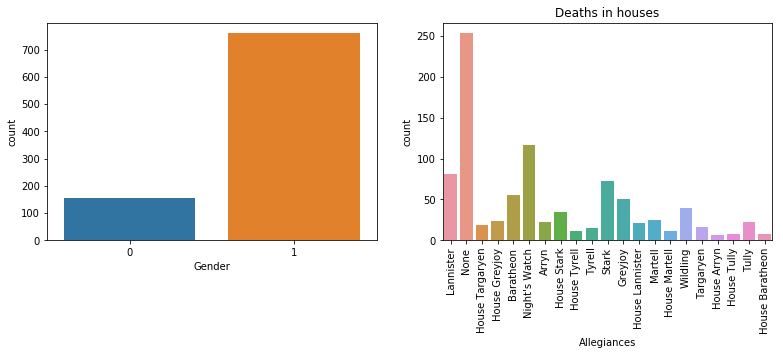

In [21]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(deaths['Gender'])

plt.subplot(1,2,2)
sns.countplot(deaths['Allegiances'])
plt.title('Deaths in houses')
plt.xticks(rotation=90)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
battles.head(5)

,name,year,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,1.0,0.0,15000.0,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands


In [24]:
battles['attacker_outcome']=battles['attacker_outcome'].map({'win':1,'loss':0})

In [25]:
lb= LabelEncoder()
battles['attacker_king']=lb.fit_transform(battles['attacker_king'])
battles['defender_king']=lb.fit_transform(battles['defender_king'])
battles['battle_type']=lb.fit_transform(battles['battle_type'])
battles['location']=lb.fit_transform(battles['location'])
battles['region']=lb.fit_transform(battles['region'])
battles['attacker_commander']=lb.fit_transform(battles['attacker_commander'])
battles['defender_commander']=lb.fit_transform(battles['defender_commander'])


In [26]:
X= battles.drop(['name','attacker_outcome'],axis=1)
y= battles['attacker_outcome']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
clf= RandomForestClassifier(n_estimators=2500,max_features='sqrt',max_depth=6)
clf.fit(X_train,y_train)
pred= clf.predict(X_test)
a=accuracy_score(y_test,pred)
print("The score is :{}".format(round(a*100,2)))

The score is :75.0


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
scores.mean()

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.8233333333333335